<a href="https://colab.research.google.com/github/Yajie-Xu/HuggingFace-Course-NLP/blob/main/course/en/chapter2/quiz_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch2 Quiz

Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.7 MB/s eta 0:00:00


## 9. What does the result variable contain in this code sample?


In [2]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
result = tokenizer.tokenize("Hello!")
result

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

['Hello', '!']

## 10. Is there something wrong with the following code?

In [3]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
model = AutoModel.from_pretrained("gpt2")

encoded = tokenizer("Hey!", return_tensors="pt")
result = model(**encoded)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

 > A: The tokenizer and model should always be from the same checkpoint.

## Model Head VS Model Output

Clarification:
	1.	Model Head = A predefined layer(s) at the end of the model

1. Model Head = A predefined layer(s) at the end of the model
  * It is part of the model architecture.
  * It transforms hidden states from the base model into task-specific outputs.
  * Example: A linear layer (torch.nn.Linear) for classification.

2. Model Output = The actual values computed during inference
	*	It is what the model produces after running a forward pass.
	*	Example: Logits, probabilities, predicted labels, etc.

Example: DistilBERT for Sentiment Classification

*	Base Model (distilbert): Extracts hidden representations from input text.
*	Model Head (classifier): A linear layer that maps hidden states to logits.
*	Model Output (logits): The final numerical values returned when you run inference.

In [4]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load model and tokenizer
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

# Tokenize input
sequences = ["I've been waiting for a HuggingFace course my whole life."]
tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")

# Run model
output = model(**tokens)

# Inspect components
print("Model Head (classifier layer):", model.classifier)
print("Model Output (logits):", output.logits)

Model Head (classifier layer): Linear(in_features=768, out_features=2, bias=True)
Model Output (logits): tensor([[-1.5607,  1.6123]], grad_fn=<AddmmBackward0>)


In [5]:
print(model)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


Here, the model head consists of:

*	pre_classifier: A linear transformation that prepares hidden states.
*	classifier: The final layer (this is the main classification head).
*	dropout: A dropout layer to prevent overfitting.

In [6]:
# You can directly access the classification head:
print(model.classifier)

Linear(in_features=768, out_features=2, bias=True)


This means:
*	The input dimension (in_features=768) corresponds to the hidden size of DistilBERT.
* The output dimension (out_features=2) corresponds to the number of classes (positive/negative).
* This is the model head, which converts hidden states into class logits.

#  Hidden States → Model Head → Model Output

1. Is “Hidden States” a Part of Model Architecture Like the Model Head?

Not exactly. Unlike the model head, which is a predefined layer (e.g., a linear layer), hidden states are not a specific “layer” in the architecture. Instead, they are the **intermediate outputs** of the transformer layers inside the model.

* 	**Model head**: A well-defined component (e.g., nn.Linear) that processes the hidden states.
* **Hidden states**: The output of transformer layers (not a separate module).

💡 Think of hidden states as temporary values (features), while the model head is a permanent structure in the model.

2. The Full Flow

* Tokenization: Convert text into token IDs.
* Hidden States Generation: Base model (distilbert) creates hidden states.
* Classification Head: The last hidden state passes through the classifier.
* Final Output: Logits are produced.

In [7]:
tokens = tokenizer(["Hello world"], return_tensors="pt")

# Step 1: Get hidden states (before the classifier)
hidden_states = model.distilbert(**tokens).last_hidden_state  # Transformer output
print("Hidden states shape:", hidden_states.shape)

# Step 2: Pass hidden states to model head manually
cls_representation = hidden_states[:, 0, :]  # Take CLS token's representation
logits = model.classifier(cls_representation)  # Use classification head
print("Logits:", logits)

Hidden states shape: torch.Size([1, 4, 768])
Logits: tensor([[-0.2414,  0.0831]], grad_fn=<AddmmBackward0>)


**Summary**

| Concept         | What It Represents                                  | How to Access                                |
|---------------|-------------------------------------------------|--------------------------------|
| **Hidden states** | Features learned by the transformer layers  | `output.last_hidden_state` or `output.hidden_states[-1]` |
| **Model head**   | A fixed structure (e.g., `nn.Linear`) that turns hidden states into final predictions | `model.classifier` |
| **Model output** | The actual result from the model head (e.g., logits) | `output.logits` |

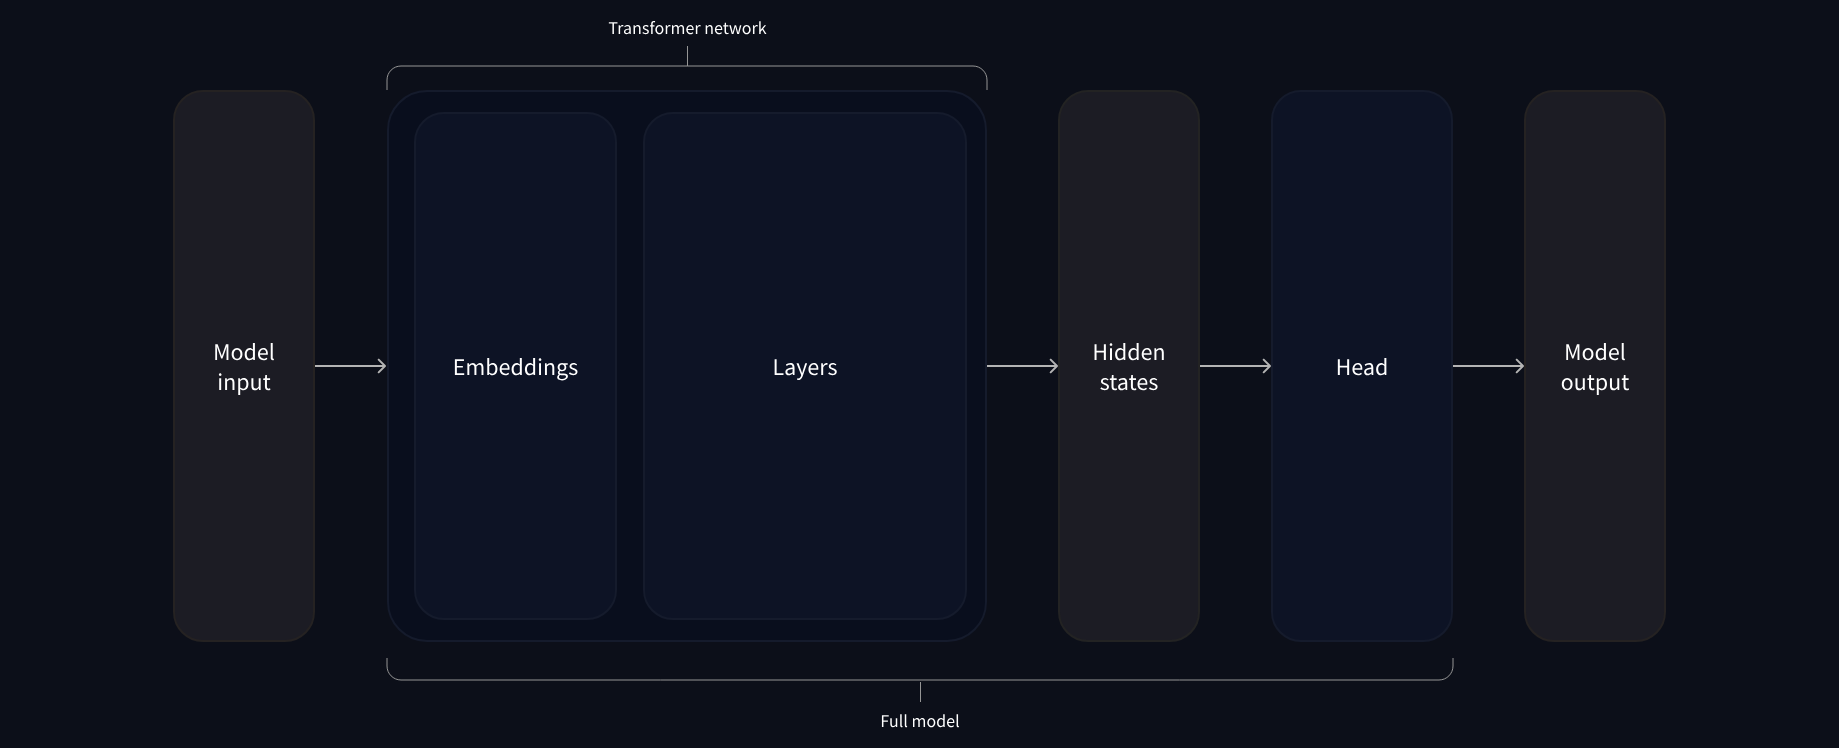

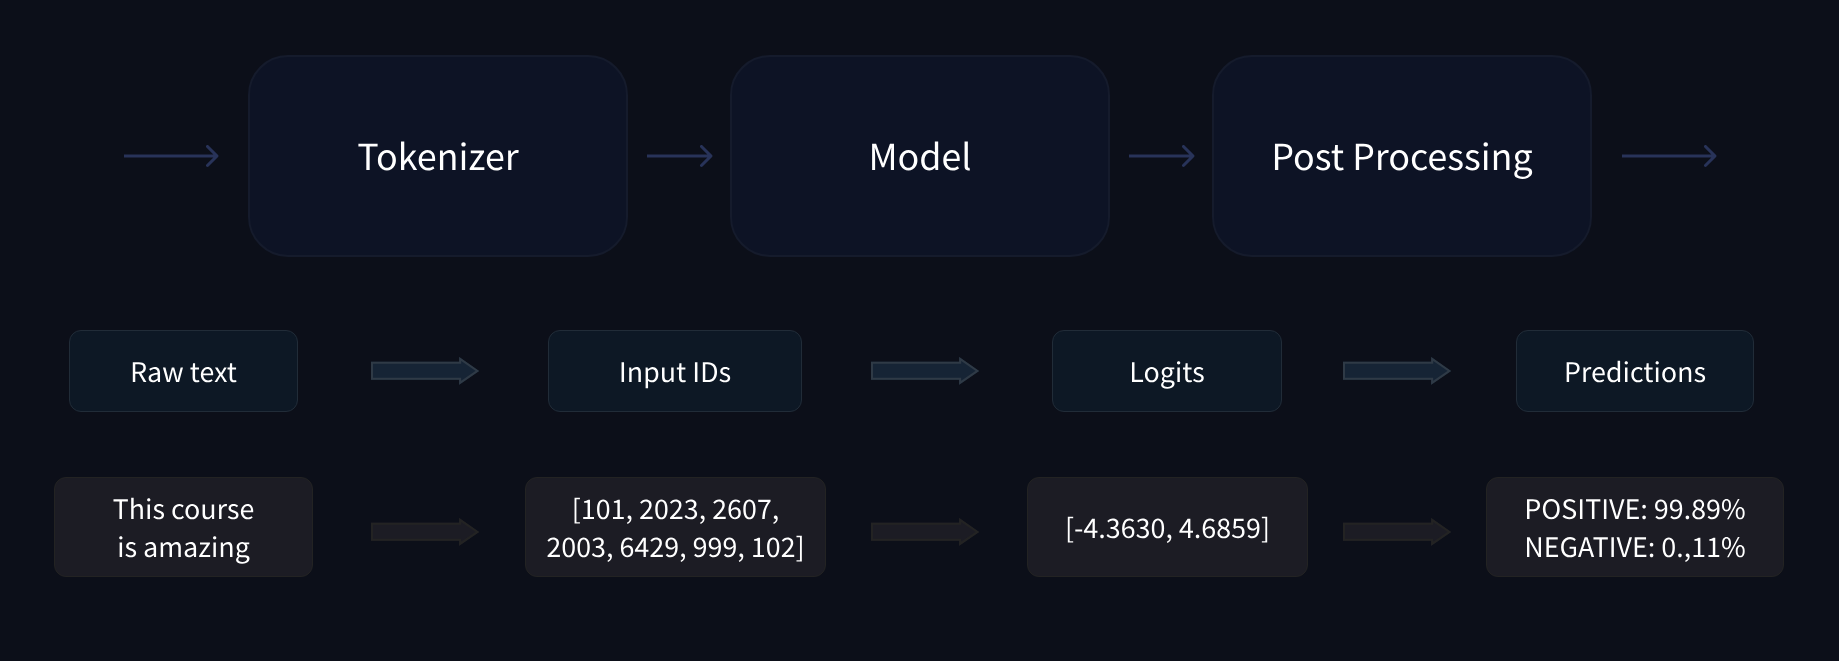